In [2]:
HEAD_PATH = "/home/hunk/workspaces/demo/studyQuantitativeTrading/intern"

import warnings
 
warnings.filterwarnings('ignore')

DATA_PATH = HEAD_PATH + "/stock pkl/"

In [3]:
import os
os.chdir(DATA_PATH)
os.getcwd()

In [7]:
def ncpus():
    #for Linux, Unix and MacOS
    if hasattr(os, "sysconf"):
        if "SC_NPROCESSORS_ONLN" in os.sysconf_names:
            #Linux and Unix
            ncpus = os.sysconf("SC_NPROCESSORS_ONLN")
            if isinstance(ncpus, int) and ncpus > 0:
                return ncpus
        else:
            #MacOS X
            return int(os.popen2("sysctl -n hw.ncpu")[1].read())
    #for Windows
    if "NUMBER_OF_PROCESSORS" in os.environ:
        ncpus = int(os.environ["NUMBER_OF_PROCESSORS"])
        if ncpus > 0:
            return ncpus
    #return the default value
    return 1
CORE_NUM = ncpus()
CORE_NUM

4

In [8]:
product_list = ["600276","000538",  "600332", "600436", "600535"]
product = product_list[0]

In [17]:
dire = DATA_PATH + product
dire

'/home/hunk/workspaces/demo/studyQuantitativeTrading/intern/stock pkl/600276'

In [18]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
all_dates

['2020.pkl', '2018.pkl', '2016.pkl', '2017.pkl', '2019.pkl']

In [40]:
date = "2018"

import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

data

,date.time,price,traded.num,turnover,qty,bid1,bid2,bid3,bid4,bid5,...,ask2.qty,ask3.qty,ask4.qty,ask5.qty,adjust,wpr,next.bid,next.ask,wpr.ret,ret
0,2018-01-02 09:25:01,69.42,66,1665802.0,240,69.42,69.40,69.35,69.28,69.20,...,1,1,54,3,0.993027,68.955392,69.47,69.48,0.000000,0.000000
1,2018-01-02 09:30:00,69.47,7,409861.0,59,69.47,69.42,69.40,69.35,69.28,...,96,1,3,30,0.993027,68.994422,69.42,69.59,0.039029,0.000566
2,2018-01-02 09:30:02,69.42,48,1838507.0,265,69.42,69.40,69.35,69.28,69.20,...,13,1,15,3,0.993027,69.074469,69.48,69.60,0.080047,0.001160
3,2018-01-02 09:30:06,69.48,36,993680.0,143,69.48,69.47,69.46,69.44,69.42,...,1,15,3,5,0.993027,69.084858,69.65,69.66,0.010389,0.000150
4,2018-01-02 09:30:12,69.66,4,55720.0,8,69.65,69.48,69.47,69.46,69.44,...,3,5,35,11,0.993027,69.170258,69.65,69.67,0.085400,0.001235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073071,2018-12-28 14:56:48,52.73,14,394496.0,75,52.73,52.72,52.71,52.70,52.69,...,86,10,12,10,0.995142,52.481050,52.71,52.72,0.007761,0.000148
1073072,2018-12-28 14:56:51,52.71,6,163520.0,31,52.71,52.70,52.69,52.68,52.67,...,11,10,86,10,0.995142,52.454949,52.71,52.72,-0.026102,-0.000497
1073073,2018-12-28 14:56:54,52.71,5,432256.0,82,52.71,52.70,52.69,52.68,52.67,...,27,10,71,10,0.995142,52.455861,52.73,52.75,0.000913,0.000017
1073074,2018-12-28 14:56:57,52.75,33,701376.0,133,52.73,52.72,52.71,52.70,52.69,...,10,22,10,36,0.995142,52.474276,52.74,52.75,0.018414,0.000351


In [41]:
import numpy as np
aa= np.array([x[0:10] for x in data["date.time"]])
aa

array(['2018-01-02', '2018-01-02', '2018-01-02', ..., '2018-12-28',
       '2018-12-28', '2018-12-28'], dtype='<U10')

In [42]:
data.columns

Index(['date.time', 'price', 'traded.num', 'turnover', 'qty', 'bid1', 'bid2',
       'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1.qty', 'bid2.qty', 'bid3.qty', 'bid4.qty', 'bid5.qty', 'ask1.qty',
       'ask2.qty', 'ask3.qty', 'ask4.qty', 'ask5.qty', 'adjust', 'wpr',
       'next.bid', 'next.ask', 'wpr.ret', 'ret'],
      dtype='object')

In [43]:
data.iloc[0:10,0:10]

,date.time,price,traded.num,turnover,qty,bid1,bid2,bid3,bid4,bid5
0,2018-01-02 09:25:01,69.42,66,1665802.0,240,69.42,69.40,69.35,69.28,69.20
1,2018-01-02 09:30:00,69.47,7,409861.0,59,69.47,69.42,69.40,69.35,69.28
2,2018-01-02 09:30:02,69.42,48,1838507.0,265,69.42,69.40,69.35,69.28,69.20
3,2018-01-02 09:30:06,69.48,36,993680.0,143,69.48,69.47,69.46,69.44,69.42
4,2018-01-02 09:30:12,69.66,4,55720.0,8,69.65,69.48,69.47,69.46,69.44
5,2018-01-02 09:30:15,69.67,8,132349.0,19,69.65,69.60,69.55,69.48,69.47
6,2018-01-02 09:30:18,69.50,8,167107.0,24,69.55,69.50,69.48,69.47,69.46
7,2018-01-02 09:30:24,69.67,2,13923.0,2,69.67,69.60,69.55,69.50,69.48
8,2018-01-02 09:30:27,69.68,4,69659.0,10,69.67,69.66,69.60,69.55,69.50
9,2018-01-02 09:30:30,69.67,4,132374.0,19,69.66,69.60,69.55,69.50,69.48


In [44]:
data.iloc[0:10,10:20]

,ask1,ask2,ask3,ask4,ask5,bid1.qty,bid2.qty,bid3.qty,bid4.qty,bid5.qty
0,69.44,69.45,69.46,69.47,69.48,157,36,2,3,1
1,69.48,69.49,69.50,69.58,69.59,25,157,36,2,3
2,69.59,69.60,69.65,69.66,69.67,142,36,2,8,1
3,69.60,69.65,69.66,69.67,69.68,3,6,4,15,114
4,69.66,69.67,69.68,69.69,69.70,15,63,6,4,15
5,69.67,69.68,69.69,69.70,69.78,8,1,1,8,6
6,69.67,69.68,69.69,69.70,69.78,5,2,8,6,4
7,69.68,69.69,69.70,69.78,69.79,2,3,68,4,8
8,69.68,69.69,69.70,69.78,69.79,12,10,5,68,4
9,69.67,69.68,69.69,69.70,69.78,10,5,7,4,8


In [45]:
data.iloc[0:10,20:]

,ask1.qty,ask2.qty,ask3.qty,ask4.qty,ask5.qty,adjust,wpr,next.bid,next.ask,wpr.ret,ret
0,3,1,1,54,3,0.993027,68.955392,69.47,69.48,0.000000,0.000000
1,3,96,1,3,30,0.993027,68.994422,69.42,69.59,0.039029,0.000566
2,31,13,1,15,3,0.993027,69.074469,69.48,69.60,0.080047,0.001160
3,1,1,15,3,5,0.993027,69.084858,69.65,69.66,0.010389,0.000150
4,10,3,5,35,11,0.993027,69.170258,69.65,69.67,0.085400,0.001235
5,1,5,35,11,8,0.993027,69.181954,69.55,69.67,0.011696,0.000169
6,1,5,34,11,8,0.993027,69.164300,69.67,69.68,-0.017654,-0.000255
7,5,34,11,8,80,0.993027,69.186998,69.67,69.68,0.022698,0.000328
8,3,34,11,8,80,0.993027,69.192105,69.66,69.67,0.005107,0.000074
9,25,3,34,11,8,0.993027,69.177068,69.55,69.59,-0.015037,-0.000217


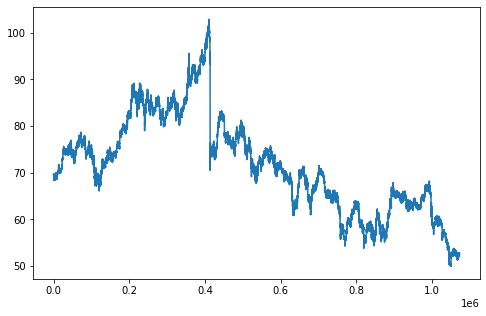

In [52]:
# conda install matplotlib
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 5))
#plt.plot(data["wpr"].values);
#plt.plot(data["traded.num"].values);
#plt.plot(data["turnover"].values);
plt.plot(data["price"].values);


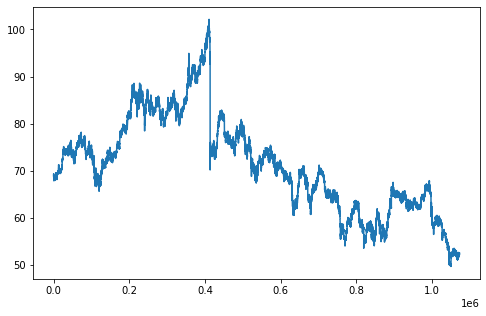

In [53]:
plt.figure(2, figsize=(8, 5))
plt.plot(data["price"]*data["adjust"]);

In [55]:
data["date.time"]
data["bid1"]
data["bid1"].shift(-1)

0          69.47
1          69.42
2          69.48
3          69.65
4          69.65
           ...  
1073071    52.71
1073072    52.71
1073073    52.73
1073074    52.74
1073075      NaN
Name: bid1, Length: 1073076, dtype: float64

In [57]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

def save(data, path):
    serialized = cPickle.dumps(data)
    with gzip.open(path, 'wb', compresslevel=1) as file_object:
        file_object.write(serialized)
    data
        
def addWpr(date, product):
    data = load(DATA_PATH+"/"+product+"/"+date)
    data["wpr"] = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])
    outlier = (data["bid1"]<1e-6) | (data["ask1"]<1e-6) | (np.isnan(data["wpr"]))
    data["wpr"][outlier] = data["price"][outlier]
    data["next.bid"] = data["bid1"].shift(-1)
    data["next.ask"] = data["ask1"].shift(-1)
    data["wpr"] = data["wpr"]*data["adjust"]
    data["wpr.ret"] = data["wpr"]-data["wpr"].shift(1)
    data["wpr.ret"][0] = 0
    data["ret"] = np.log(data["wpr"]) - np.log(data["wpr"]).shift(1)
    data["ret"][0] = 0
    save(data, DATA_PATH+"/"+product+"/"+date)

In [62]:
%%time
for product in product_list:
    result = parLapply(CORE_NUM, all_dates, addWpr, product=product)

CPU times: user 133 ms, sys: 580 ms, total: 713 ms
Wall time: 50.8 s


In [63]:
product = product_list[0]
data = load(DATA_PATH+"/"+product+"/"+"2018.pkl")

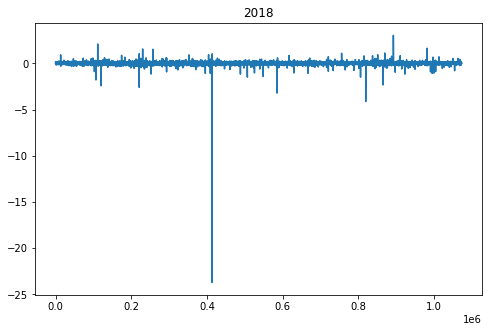

In [64]:
plt.figure(3, figsize=(8, 5))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);